In [811]:
import importlib
import Zer 
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(Zer)

<module 'Zer' from 'd:\\SUSTUDY\\MOPTIM\\2\\Codes\\motion_compensation\\class\\Zer.py'>

In [812]:
rho=np.linspace(0,1,100)
theta=np.linspace(0,2*np.pi,100)
zer= Zer.Zer(10,100,rho,theta)

In [813]:
Z=zer.Construct_Zernike()

In [814]:
time1=np.linspace(0,1,50)
time2=np.linspace(0,1,50)
dZ_dx=np.ones(100)
dZ_dy=np.ones(100)
times=[time1,time2]
M=zer.Construct_M(times,2,dZ_dx,dZ_dy)

array([[ 10000.    ,  -5000.    ,   2500.    ,  -1250.    ,    625.    ,
          -312.5   ,    156.25  ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    , -10000.    ,   5000.    ,
         -2500.    ,   1250.    ,   -625.    ,    312.5   ,   -156.25  ,
            -0.    ,     -0.    ,     -0.    ,     -0.    ,     -0.    ,
            -0.    ,     -0.    ,     -0.    ,     -0.    ,     -0.    ,
            -0.    ,     -0.    ,     -0.    ,     -0.    ,     -0.    ,
            -0.    ],
       [     0.    ,  10000.    , -10000.    ,   7500.    ,  -5000.    ,
          3125.    ,  -1875.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0. 

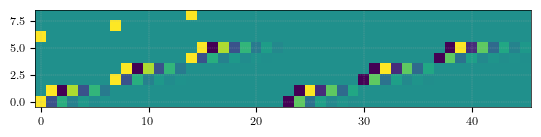

In [815]:
C=zer.Construct_C(times,2,10000,dZ_dx,dZ_dy)
plt.imshow(C)
C

In [816]:
dd=np.array([1,1])
x,y=zer.diff_zer(dd,dd,4,0)
x,y

(array([72., 72.]), array([72., 72.]))

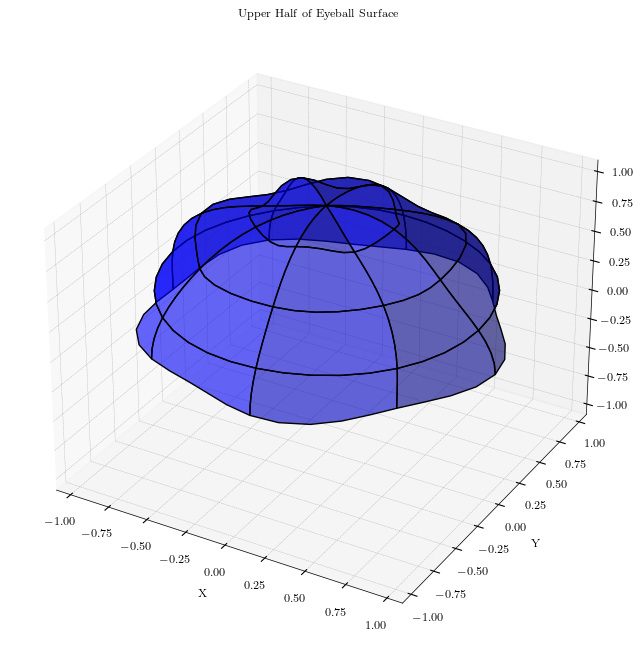

In [817]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
r = 1  # 球半径
n = 20  # theta 的分割数
m = 40  # phi 的分割数

# 生成 theta 和 phi 的值
theta = np.linspace(0, np.pi / 2, n)  # 只绘制上半球
phi = np.linspace(0, 2 * np.pi, m)

# 生成网格
theta, phi = np.meshgrid(theta, phi)

# 计算球面坐标并添加细微纹理
perturbation = 0.05 * np.sin(5 * theta) * np.cos(5 * phi)  # 细微的扰动
radius = r + perturbation

x = radius * np.sin(theta) * np.cos(phi)
y = radius * np.sin(theta) * np.sin(phi)
z = radius * np.cos(theta)

# 创建三维图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
ax.plot_surface(x, y, z, rstride=5, cstride=5, color='b', edgecolor='k', alpha=0.6)

# 设置坐标轴范围
max_range = np.max([np.max(x), np.max(y), np.max(z)])  # 计算最大范围
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

# 设置轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Upper Half of Eyeball Surface')

# 显示图形
plt.show()

In [818]:
theta=theta.flatten()
phi = phi.flatten()
z=z.flatten()

In [819]:
zer= Zer.Zer(10,800,phi,theta)

In [820]:
zer.Construct_Zernike()

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [ 1.00000000e+00,  9.86361303e-01,  1.64594590e-01, ...,
        -5.46948158e-01,  2.45485487e-01,  8.25793455e-02],
       [ 1.00000000e+00,  9.96584493e-01,  8.25793455e-02, ...,
        -8.79473751e-01,  7.89140509e-01, -6.77281572e-01],
       [ 1.00000000e+00,  1.00000000e+00,  6.12323400e-17, ...,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00]])

In [821]:

zer.Zernike.shape

(800, 66)

In [822]:
inverse=np.linalg.pinv(np.dot(zer.Zernike.T,zer.Zernike))
beta = np.dot(inverse,np.dot(zer.Zernike.T,z.T))

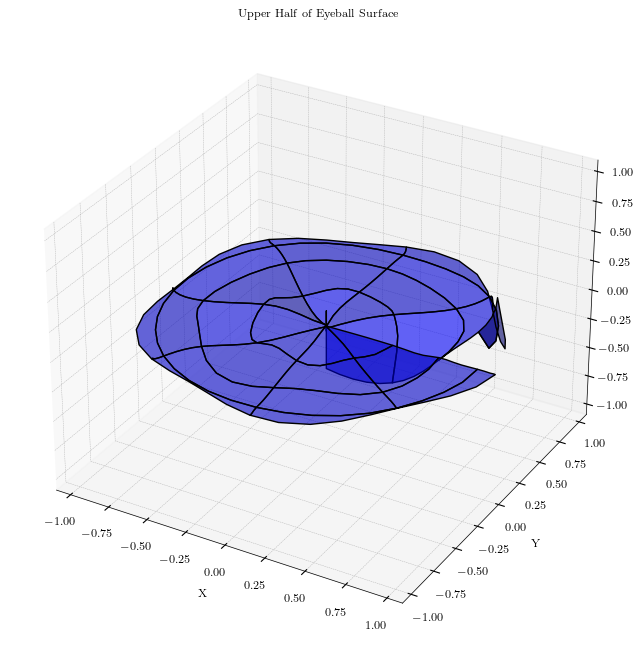

In [823]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置参数
r = 1  # 球半径
n = 20  # theta 的分割数
m = 40  # phi 的分割数

# 生成 theta 和 phi 的值
theta = np.linspace(0, np.pi / 2, n)  # 只绘制上半球
phi = np.linspace(0, 2 * np.pi, m)

# 生成网格
theta, phi = np.meshgrid(theta, phi)

# 计算球面坐标并添加细微纹理
perturbation = 0.05 * np.sin(5 * theta) * np.cos(5 * phi)  # 细微的扰动
radius = r + perturbation

x = radius * np.sin(theta) * np.cos(phi)
y = radius * np.sin(theta) * np.sin(phi)
z = (np.dot(zer.Zernike,beta)-(radius * np.cos(theta)).flatten()).reshape(x.shape)

# 创建三维图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
ax.plot_surface(x, y, z, rstride=5, cstride=5, color='b', edgecolor='k', alpha=0.6)

# 设置坐标轴范围
max_range = np.max([np.max(x), np.max(y), np.max(z)])  # 计算最大范围
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

# 设置轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Upper Half of Eyeball Surface')

# 显示图形
plt.show()

C:\Windows\Temp\ipykernel_18748\2142062710.py:21: RuntimeWarning: invalid value encountered in sqrt
  z_sp = 0.1*np.sqrt(R_SP**2 - x_sp**2 - y_sp**2)


       time  x_coordinate  y_coordinate  z_coordinate
0  0.000000      0.000000      4.000000      0.000000
1  0.000033      0.024551      3.999679      0.004429
2  0.000067      0.049101      3.998718      0.008856
3  0.000100      0.073649      3.997116      0.013282
4  0.000133      0.098195      3.994873      0.017705


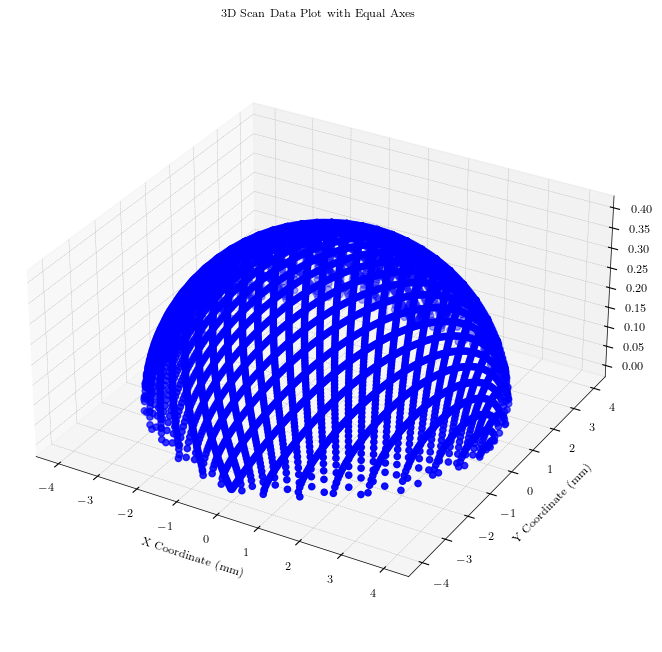

In [824]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
R_SP = 4  # radius in mm
T = 0.546  # period in seconds
a = 16
b = 33
omega = 2 * np.pi / T
sampling_rate = 30000  # in Hz
total_samples = int(T * sampling_rate)  # total samples in one period

# Time array
t = np.linspace(0, T, total_samples)

# Scan pattern equations
x_sp = R_SP * np.sin(a * omega * t)
y_sp = R_SP * np.cos(b * omega * t)
z_sp = 0.1*np.sqrt(R_SP**2 - x_sp**2 - y_sp**2)

# Update the dataset with z-coordinate


# Creating the dataset
scan_data = pd.DataFrame({
    'time': t,
    'x_coordinate': x_sp,
    'y_coordinate': y_sp,
    'z_coordinate':z_sp
})
filtered_data = scan_data[(scan_data['x_coordinate'] != 0) & (scan_data['y_coordinate'] != 0)]
print(scan_data.head())

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
ax.scatter(scan_data['x_coordinate'], scan_data['y_coordinate'], scan_data['z_coordinate'], c='blue', marker='o')

# Setting equal aspect ratio
ax.set_box_aspect([1,1,0.5])  # Equal aspect ratio

# Labeling the axes
ax.set_xlabel('X Coordinate (mm)')
ax.set_ylabel('Y Coordinate (mm)')
ax.set_zlabel('Z Coordinate (mm)')

# Setting the title
ax.set_title('3D Scan Data Plot with Equal Axes')

# Show plot
plt.show()


In [825]:
x=x_sp.flatten()
y=y_sp.flatten()
z=z_sp.flatten()
rho = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

In [826]:
zer= Zer.Zer(10,16380,rho,theta)
zer.Construct_Zernike()
inverse=np.linalg.pinv(np.dot(zer.Zernike.T,zer.Zernike))
beta = np.dot(inverse,np.dot(zer.Zernike.T,z.T))

In [827]:
dZ_dx,dZ_dy=zer.diff(x,y,beta)
dZ_dx.shape

d:\SUSTUDY\MOPTIM\2\Codes\motion_compensation\class\Zer.py:217: RuntimeWarning: divide by zero encountered in divide
  diff=-1*y/x**2+y**2
d:\SUSTUDY\MOPTIM\2\Codes\motion_compensation\class\Zer.py:237: RuntimeWarning: invalid value encountered in multiply
  diffx_zer=diffr_R(n,m,rho)*diffx_r(x,y)+difftheta_R(n,m,rho,theta)*diffx_theta(x,y)
d:\SUSTUDY\MOPTIM\2\Codes\motion_compensation\class\Zer.py:231: RuntimeWarning: invalid value encountered in divide
  diff=-x/x**2+y**2


(16380,)

In [828]:
t=[t]
C=zer.Construct_C(t,1,10000,dZ_dx,dZ_dy)
M=zer.Construct_M(t,1,dZ_dx,dZ_dy)
Wudi=zer.Construct_bigmat()
z=np.hstack(z,np.zeros((6*(zer.Z_star-1)+3)))


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16380 and the array at index 1 has size 3

In [ ]:
inverse=np.linalg.pinv(np.dot(Wudi.T,Wudi))
beta = np.dot(inverse,np.dot(Wudi.T,z.T))